# Linear Classification And Gradient Descent

Text(0,0.5,'loss')

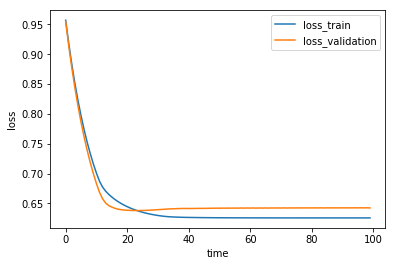

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
#读取数据集
X,y = ds.load_svmlight_file("D:/traindata/australian_scale.txt")
X = X.toarray()
row = X.shape[0]
B = np.ones([row,])
X = np.c_[X,B]
#切分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
r_train = X_train.shape[0]
#参数全零初始化
W = np.zeros([15,])
#学习率
lr = 0.05
#迭代次数
t = 100
#阈值
value = 0.2
#储存迭代中loss值
L_train = np.zeros([t])
L_validation = np.zeros([t])
for n in range(t):
    #梯度初始化
    g = 0
    for i in range(r_train):
        #对训练集所有样本求梯度g
        if 1-y_train[i]*(W.T.dot(X_train[i])) >= 0:
            g = g + W - X_train[i]*y_train[i]
        else:
            g = g + W
    #取平均值
    g = g/r_train
    #更新模型参数
    W = W - lr*g
    r = 0
    #命中数
    hit = 0
    for i in range(r_train):
        r = r + max(0,1-y_train[i]*W.T.dot(X_train[i]))
        if (W.dot(X_train[i]) >= value and y_train[i] == 1) or (W.dot(X_train[i]) < value and y_train[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_train = hit/r_train
    #计算训练集loss
    L_train[n] = 0.5*W.T.dot(W) + 1/r_train*r
    r = 0
    #命中数
    hit = 0
    for i in range(row-r_train):
        r = r + max(0,1-y_test[i]*W.T.dot(X_test[i]))
        if (W.dot(X_test[i]) >= value and y_test[i] == 1) or (W.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #测试集准确率
    accuracy_test = hit/(row-r_train)
    #计算验证集loss
    L_validation[n] = 0.5*W.T.dot(W) + 1/(row-r_train)*r
#制图
n = np.arange(t)
plt.plot(n,L_train[n],label='loss_train')
plt.plot(n,L_validation[n],label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')